In [17]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

#det0 = serpent.parse_det('../neutronics_paper/reproc/core_det0.m')
det0 = serpent.parse_det('/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/pwr100_0_100/pwr_spectrum_det_det0.m')

#det10 = serpent.parse_det('load_follow_0-100-0/100-2w-0-4d/tap100_0_100/tap_spectrum.ini_det0.m')
det10 = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/bol_jeff/tap_spectrum_bol_jeff.serpent_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/eol_jeff/kl_1/tap_spectrum_eol_jeff.serpent_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
energy_grid = det0['DETavrgE']
spectrum_grid = det0['DETavrg']
spectrum_grid2 = det10['DETavrg']
energy = energy_grid[:,2]
flux_spectrum = spectrum_grid[:,10]

# Capture cross section read (Xe135,I135)

In [18]:
file_data_xe = np.genfromtxt("/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/xe135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)
file_data_i = np.genfromtxt("/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/i135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)

energy_grid_xe = np.array(file_data_xe[:,0])
energy_grid_i = np.array(file_data_i[:,0])
xe_capture_xs = np.array(file_data_xe[:,1])
i_capture_xs =  np.array(file_data_i[:,1])

<IPython.core.display.Javascript object>


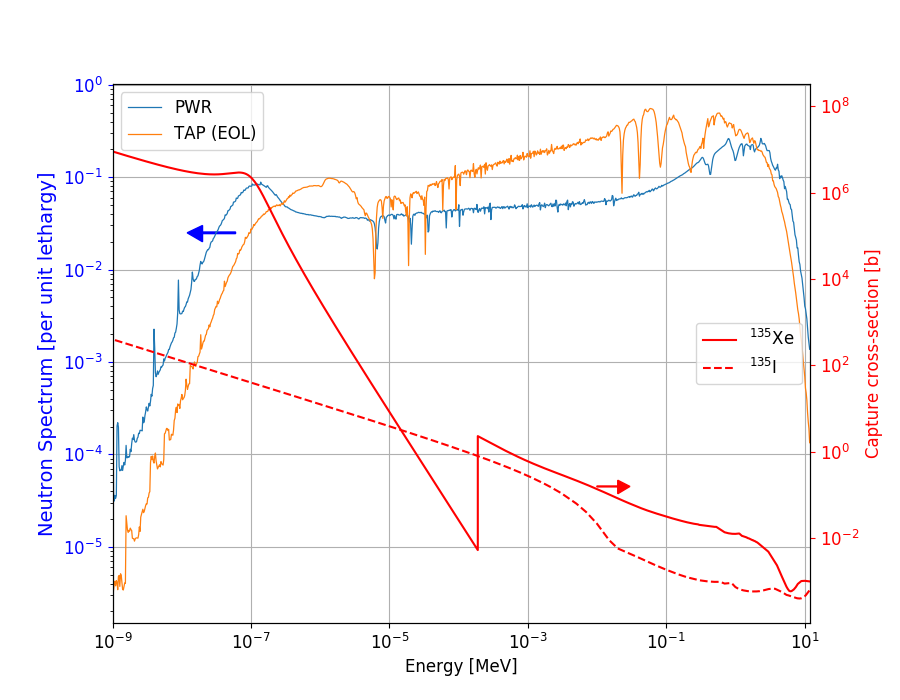

In [104]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[9,7])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]', fontsize=12)
ax1.set_ylabel('Neutron Spectrum [per unit lethargy]', color='b', fontsize=14)
ax1.tick_params('y', colors='b', labelsize=12)
ax1.tick_params('x', labelsize=12)
#ax.set_ylim(0,1.6E+21)
#ax1.set_xlim(1e-11,12)

ax1.loglog(energy, spectrum_grid[:,10]/np.trapz(spectrum_grid[:,10],energy), '-', label='PWR', 
           linewidth=0.9)
ax1.loglog(energy, spectrum_grid2[:,10]/np.trapz(spectrum_grid2[:,10],energy), '-', label='TAP (EOL)', 
           linewidth=0.9)
#ax1.semilogx(energy, spectrum_grid_eoc[:,10]/np.trapz(spectrum_grid_eoc[:,10],energy), '-', label='TAP(EOC)', 
#            color='orange')

#ax.semilogx(energy, spectrum_grid[:,10], '-', label='PWR', color='#ff8100')
#ax.semilogx(energy, spectrum_grid2[:,10], '-', label='TAP(BOC)', linewidth=1, alpha=0.5)
#ax.semilogx(energy, spectrum_grid3[:,10], '-', label='TAP(before shutdown)', linewidth=0.7)
ax1.legend(loc=2, fontsize=12)

ax2=ax1.twinx()
ax2.loglog(energy_grid_xe, xe_capture_xs, '-',markevery=[100,210],fillstyle='none',color='r',label=r'$^{135}$Xe')
ax2.loglog(energy_grid_i, i_capture_xs, '--',markevery=[92,125],fillstyle='none',color='r',label=r'$^{135}$I')
ax2.set_ylabel('Capture cross-section [b]', color='r', fontsize=12)
ax2.tick_params('y', colors='r', labelsize=12)
ax2.set_xlim(1e-9,12)
ax2.legend(loc=7, fontsize=12)
ax1.arrow(6e-8, 2.5e-2, -4e-8, 0, head_width=1e-2, head_length=8e-9, fc='b', ec='b')
ax1.arrow(1e-2, 4.5e-5,  1e-2, 0, width=1e-6, head_width=1.5e-5, head_length=1e-2, fc='r', ec='r')

fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch5/tap_vs_pwr_spectrum.png',bbox_inches='tight', dpi=700)